<a href="https://colab.research.google.com/github/Gideon18-web/Data-Analysis-/blob/main/statistics_for_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing and Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
# Load dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

In [ ]:
df.describe()

,math score,reading score,writing score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
# Encode categorical variables
encoding = {
    "gender": {"female": 1, "male": 0},
    "lunch": {"standard": 1, "free/reduced": 0},
    "test preparation course": {"completed": 1, "none": 0},
    "parental level of education": {
        "some high school": 1,
        "high school": 2,
        "some college": 3,
        "associate's degree": 4,
        "bachelor's degree": 5,
        "master's degree": 6
    }
}
df.replace(encoding, inplace=True)

/tmp/ipython-input-604574671.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


In [ ]:
# Generate Dummy Variables for race/ethnicity column.

df = pd.get_dummies(df, columns=["race/ethnicity"], drop_first=True)

In [ ]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E'],
      dtype='object')

In [ ]:
# Independent T-test for Test Preparation Course
completed = df[df["test preparation course"] == 1]["average_score"]
not_completed = df[df["test preparation course"] == 0]["average_score"]
t_test_result = stats.ttest_ind(completed, not_completed, equal_var=False)
print("\nT-Test Results: Test Preparation Course")
print(t_test_result)


T-Test Results: Test Preparation Course
TtestResult(statistic=np.float64(8.594538326688614), pvalue=np.float64(4.426725271318694e-17), df=np.float64(791.841856924758))


Results Interpretation:

The results show that the p-value at 4.4267e-17, is much less than the typical significance level of 0.05. This indicates there is very strong evidence to reject the null hypothesis (H₀).
This means there is a statistically significant difference in test scores between students who completed the test preparation course and those who did not. Students who completed the test preparation course tend to have higher test scores, supporting the alternative hypothesis (H₁).

Case Study 2:

Question: Does parental education level impact student performance?

Hypothesis:

H₀: There is no significant difference in test scores based on parental education level.

H₁: Students with parents who have higher education levels score higher.

In [ ]:
# ANOVA for Parental Education Level
anova_result = stats.f_oneway(*[df[df["parental level of education"] == level]["average_score"] for level in df["parental level of education"].unique()])
print("\nANOVA Results: Parental Education Level")
print(anova_result)


ANOVA Results: Parental Education Level
F_onewayResult(statistic=np.float64(10.75314696233657), pvalue=np.float64(4.3810464809431664e-10))


Interpretation:

In this case, the p-value is extremely small (4.3810e-10), which is much less than the significance level of 0.05. This means there is very strong evidence to reject the null hypothesis (H₀).
Therefore, we conclude that there is a statistically significant difference in test scores based on parental education level.
This supports the alternative hypothesis (H₁) that parental education level does impact student performance. This implies that students with parents who have higher education levels tend to have higher test scores.

Case Study 3:

Question:

Is there an association between gender and the completion of a test preparation course among students?

Null Hypothesis (H₀):

There is no association between gender and the completion of a test preparation course.

Alternative Hypothesis (H₁):

There is an association between gender and the completion of a test preparation course.

In [ ]:
# Choose two categorical columns for analysis and create a contingency table

contingency_table = pd.crosstab(df['gender'], df['test preparation course'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test Results for {'gender'} vs. {'test preparation course'}:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Test Results for gender vs. test preparation course:
Chi-Square Statistic: 0.015529201882465888
P-value: 0.9008273880804724
Degrees of Freedom: 1
Expected Frequencies:
 [[309.444 172.556]
 [332.556 185.444]]


Interpretataion:

In this case, the p-value (0.9008) is much greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis.
There is not enough evidence to suggest a significant association between gender and the completion of a test preparation course. In other words, the results suggest that gender and test preparation course completion are independent of each other.

2.0 CORRELATION ANALYSIS

A. Pearson's Correlation Coefficient (r)

Pearson’s correlation coefficient (𝑟) quantifies the linear relationship between two continuous numerical variables. It measures how well the data fits a straight-line relationship.

Case Study 1:

Question: Is there a correlation between math, reading, and writing scores?

Hypothesis:

H₀: There is no correlation between math, reading, and writing scores.
H₁: There is a significant correlation between test scores.



In [ ]:
# Compute Pearson correlation coefficients between math, reading, and writing scores
correlation_matrix = df[["math score", "reading score", "writing score"]].corr(method="pearson")

# Display correlation matrix using IPython.display
from IPython.display import display
display(correlation_matrix)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
#alt code for the pearson correlation of each
correlation_matrix = df.corr(method="pearson")
print(correlation_matrix)

                               gender  parental level of education     lunch  \
gender                       1.000000                     0.043934 -0.021372   
parental level of education  0.043934                     1.000000 -0.023259   
lunch                       -0.021372                    -0.023259  1.000000   
test preparation course     -0.006028                    -0.007143 -0.017044   
math score                  -0.167982                     0.159432  0.350877   
reading score                0.244313                     0.190908  0.229560   
writing score                0.301225                     0.236715  0.245769   
average_score                0.130861                     0.205785  0.290064   
race/ethnicity_group B       0.028466                    -0.070537 -0.008257   
race/ethnicity_group C       0.063368                     0.039925 -0.003385   
race/ethnicity_group D      -0.030566                     0.015235 -0.009458   
race/ethnicity_group E      -0.020302   

Results Interpretation:

Math & Reading: 0.818 There is a strong positive correlation between math and reading scores (r = 0.818). This means that students who tend to score higher in math also tend to score higher in reading, and vice versa.
Math & Writing: There is a strong positive correlation between math and writing scores (r = 0.803). This means that students who tend to score higher in math also tend to score higher in writing, and vice versa.
Reading & Writing: There is a very strong positive correlation between reading and writing scores (r = 0.955). This means that students who tend to score higher in reading also tend to score higher in writing, and vice versa. This is the strongest correlation among the three pairs.
Hypothesis:

We would reject the null hypothesis (H₀) which stated that there is no correlation between math, reading, and writing scores.
Instead, we would accept the alternative hypothesis (H₁) which stated that there is a significant correlation between test scores.

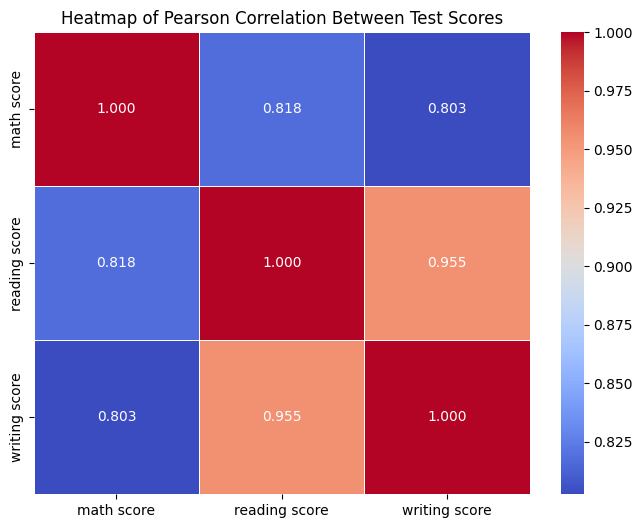

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Pearson Correlation Between Test Scores")
plt.show()

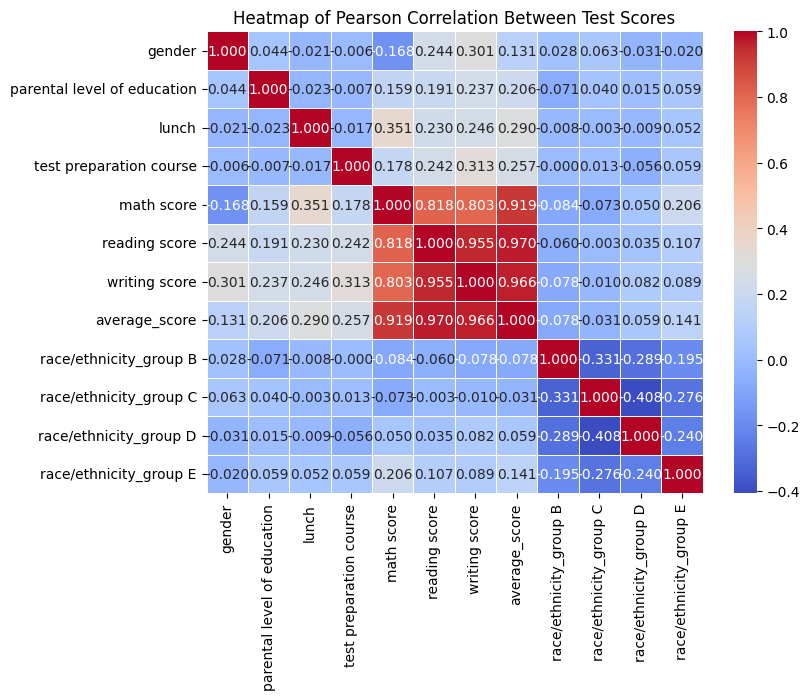

In [ ]:
#heatmap for correlation of each against each other
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Pearson Correlation Between Test Scores")
plt.show()

B.Spearman Rank Correlation (rho, 𝜌)

Spearman’s correlation (𝜌) is a non-parametric measure (relies on ranks, order, rather than distribution) of correlation that evaluates the monotonic relationship between two variables. It is based on the ranks of data rather than actual values.


Case Study 2:

Question: Is there a correlation between parental education level and student performance?

(Hint: Spearman correlation test (since parental education is ordinal).
Hypothesis:

Null Hypothesis (H₀): There is no correlation between parental education level and student performance.
Alternative Hypothesis (H₁): There is a significant correlation between parental education level and student performance.

In [ ]:
# Calculate the Spearman correlation coefficient and p-value
correlation_coefficient, p_value = stats.spearmanr(df["parental level of education"], df["average_score"])

# Print the results
print(f"Spearman Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: 0.18680818837031354
P-value: 2.64110146708766e-09


Results Interpretation:

Correlation Coefficient: The Spearman correlation coefficient (rho) is 0.1868. This indicates a weak positive correlation between parental education level and student performance. This means that there is a tendency for students with parents who have higher education levels to also have higher average scores, but the relationship is not very strong.

The p-value is extremely small (2.6411e-09), which is much less than the typical significance level of 0.05. Therefore, we reject the null hypothesis (H₀) and conclude that there is a significant correlation between parental education level and student performance.

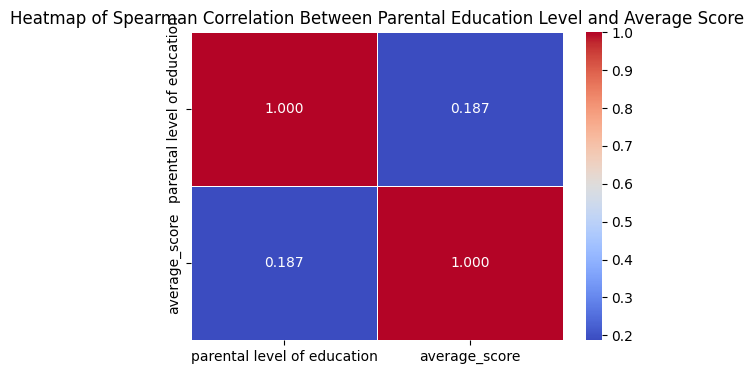

In [ ]:
#Heatmap
# Create a DataFrame with the two columns of interest
data = df[['parental level of education', 'average_score']]

#calculating the spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Spearman Correlation Between Parental Education Level and Average Score")
plt.show()

C. Spurious correlation